In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
# from wordcloud import WordCloud
import pandas as pd
import plotly.figure_factory as ff
# from src.model import apriori
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import plotly.plotly as py 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from collections import defaultdict
import itertools

In [4]:
import sys
project_path = "/home/ashmi/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [5]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [6]:
def get_cat(l):
    return l[-1]

## Data Loading

In [7]:
from src.data.json_loader import JSONLoader
# file_path corresponds to the file of the .gz file which contains the CSV file
helpfulness_path = '/home/ashmi/Desktop/Amazondata/helpfulness_analysis.csv'
df = pd.read_csv(helpfulness_path)

In [8]:
df.head()

,overall,helpfulness_ratio,review_length,Wordcount,Sentencecount,popularity,Review_age,reviewCount,Reviewer_age,ARI,...,adv_cnt,noun_cnt,Q_count,E_count,verb_cnt,caps_count,DEVIATION_RATING,punc_ratio,sentiment_polarity,subjective_polarity
0,1.0,0.800000,2175,427,23,15,2560,5,2300,11.843826,...,0.021667,0.116667,0.000920,0.000920,0.010000,1.473068,-1.400000,0.027126,0.062441,0.371296
1,3.0,0.955556,4607,846,57,45,2637,12,2494,11.639953,...,0.032456,0.097368,0.000000,0.000000,0.009649,1.404255,0.600000,0.021489,0.099464,0.404209
2,2.0,0.900000,2246,449,32,10,2561,22,1745,9.146115,...,0.038079,0.092715,0.000000,0.000000,0.023179,1.285078,-0.400000,0.023152,0.059561,0.405242
3,5.0,0.789474,352,64,7,19,2611,6,2137,9.046429,...,0.010417,0.093750,0.000000,0.000000,0.020833,1.296875,0.538813,0.025568,0.150000,0.496296
4,1.0,0.444444,724,138,9,18,2554,5,1228,10.947101,...,0.025000,0.080000,0.004144,0.004144,0.005000,1.413043,-3.461187,0.027624,0.056759,0.681019


In [9]:
df

,overall,helpfulness_ratio,review_length,Wordcount,Sentencecount,popularity,Review_age,reviewCount,Reviewer_age,ARI,...,adv_cnt,noun_cnt,Q_count,E_count,verb_cnt,caps_count,DEVIATION_RATING,punc_ratio,sentiment_polarity,subjective_polarity
0,1.0,0.800000,2175,427,23,15,2560,5,2300,11.843826,...,0.021667,0.116667,0.000920,0.000920,0.010000,1.473068,-1.400000,0.027126,0.062441,0.371296
1,3.0,0.955556,4607,846,57,45,2637,12,2494,11.639953,...,0.032456,0.097368,0.000000,0.000000,0.009649,1.404255,0.600000,0.021489,0.099464,0.404209
2,2.0,0.900000,2246,449,32,10,2561,22,1745,9.146115,...,0.038079,0.092715,0.000000,0.000000,0.023179,1.285078,-0.400000,0.023152,0.059561,0.405242
3,5.0,0.789474,352,64,7,19,2611,6,2137,9.046429,...,0.010417,0.093750,0.000000,0.000000,0.020833,1.296875,0.538813,0.025568,0.150000,0.496296
4,1.0,0.444444,724,138,9,18,2554,5,1228,10.947101,...,0.025000,0.080000,0.004144,0.004144,0.005000,1.413043,-3.461187,0.027624,0.056759,0.681019
5,5.0,0.736842,223,47,4,19,2616,10,3455,6.792447,...,0.014286,0.071429,0.000000,0.000000,0.028571,1.680851,0.538813,0.031390,0.781667,0.875000
6,3.0,0.760870,956,193,16,92,2544,14,1781,7.931613,...,0.011905,0.146825,0.000000,0.000000,0.019841,1.367876,-1.461187,0.020921,0.062255,0.489052
7,5.0,0.782609,383,73,5,23,2604,7,2833,10.581370,...,0.024194,0.096774,0.000000,0.000000,0.000000,1.328767,0.538813,0.044386,-0.024111,0.503125
8,2.0,0.533333,2503,457,27,15,2642,7,2079,12.829746,...,0.036278,0.097792,0.000000,0.000000,0.023659,1.435449,-2.461187,0.023572,0.091903,0.376687
9,1.0,0.736842,710,137,11,19,2364,8,2155,9.206762,...,0.022989,0.143678,0.000000,0.000000,0.011494,1.255474,-3.461187,0.022535,0.100000,0.517647


In [10]:
df.shape

(107501, 25)

In [11]:
df.describe()

,overall,helpfulness_ratio,review_length,Wordcount,Sentencecount,popularity,Review_age,reviewCount,Reviewer_age,ARI,...,adv_cnt,noun_cnt,Q_count,E_count,verb_cnt,caps_count,DEVIATION_RATING,punc_ratio,sentiment_polarity,subjective_polarity
count,107501.000000,107501.000000,107501.000000,107501.000000,107501.000000,107501.000000,107501.000000,107501.000000,107501.000000,107035.000000,...,107035.000000,107035.000000,107035.000000,107035.000000,107035.000000,107035.000000,107501.000000,107035.000000,107501.000000,107501.000000
mean,3.723537,0.805166,1767.483168,317.953052,21.358750,44.346146,2808.927191,25.356992,2509.266453,12.141985,...,0.032525,0.102207,0.000234,0.000234,0.013053,1.448255,-0.397790,0.031979,0.161362,0.500036
std,1.476701,0.241449,2015.418787,357.193126,29.482874,122.428818,1062.861000,44.044088,1028.190647,4.184353,...,0.014140,0.027170,0.001153,0.001153,0.009078,0.379930,1.411904,0.012431,0.140247,0.110607
min,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1226.000000,5.000000,1225.000000,-3.093909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,-3.884244,0.000000,-1.000000,0.000000
25%,3.000000,0.750000,584.000000,107.000000,8.000000,13.000000,1952.000000,7.000000,1755.000000,10.058014,...,0.024014,0.085890,0.000000,0.000000,0.007353,1.320755,-1.348485,0.024725,0.087338,0.448198
50%,4.000000,0.900000,1150.000000,209.000000,14.000000,19.000000,2581.000000,11.000000,2150.000000,11.827602,...,0.031915,0.101010,0.000000,0.000000,0.012158,1.406250,0.109375,0.030550,0.159671,0.500585
75%,5.000000,0.965517,2208.000000,398.000000,26.000000,37.000000,3519.000000,22.000000,3203.000000,13.742412,...,0.040230,0.117188,0.000000,0.000000,0.017442,1.514019,0.636364,0.037125,0.232446,0.555357
max,5.000000,1.000000,32703.000000,6141.000000,6118.000000,8152.000000,6673.000000,431.000000,6541.000000,400.842558,...,0.178571,0.400000,0.177143,0.177143,0.194444,83.000000,3.444444,0.516209,1.000000,1.000000


In [12]:
dtypes = df.dtypes

In [13]:
dtypes_df = pd.DataFrame({'feature':dtypes.index, 'type':dtypes.values})

In [14]:
dtypes_df

,feature,type
0,overall,float64
1,helpfulness_ratio,float64
2,review_length,int64
3,Wordcount,int64
4,Sentencecount,int64
5,popularity,int64
6,Review_age,int64
7,reviewCount,int64
8,Reviewer_age,int64
9,ARI,float64


In [15]:
nans = df.isnull().sum()

In [16]:
nans_df = pd.DataFrame({'feature':nans.index, 'Number of NaNs':nans.values})

In [17]:
nans_df = nans_df[nans_df.columns[::-1]]

In [18]:
nans_df

,feature,Number of NaNs
0,overall,0
1,helpfulness_ratio,0
2,review_length,0
3,Wordcount,0
4,Sentencecount,0
5,popularity,0
6,Review_age,0
7,reviewCount,0
8,Reviewer_age,0
9,ARI,466


In [19]:
analysis_df = dtypes_df.merge(nans_df, on='feature')

In [20]:
analysis_df

,feature,type,Number of NaNs
0,overall,float64,0
1,helpfulness_ratio,float64,0
2,review_length,int64,0
3,Wordcount,int64,0
4,Sentencecount,int64,0
5,popularity,int64,0
6,Review_age,int64,0
7,reviewCount,int64,0
8,Reviewer_age,int64,0
9,ARI,float64,466


In [21]:
analysis_df.feature

0                 overall
1       helpfulness_ratio
2           review_length
3               Wordcount
4           Sentencecount
5              popularity
6              Review_age
7             reviewCount
8            Reviewer_age
9                     ARI
10          no_of_reviews
11                  price
12     total_amount_spent
13      punctuation_count
14                adj_cnt
15                adv_cnt
16               noun_cnt
17                Q_count
18                E_count
19               verb_cnt
20             caps_count
21       DEVIATION_RATING
22             punc_ratio
23     sentiment_polarity
24    subjective_polarity
Name: feature, dtype: object

In [22]:
# fill missing values with mean column values
dataset = df
dataset.fillna(dataset.mean(), inplace=True)

In [23]:
# count the number of NaN values in each column
print(dataset.isnull().sum())

overall                0
helpfulness_ratio      0
review_length          0
Wordcount              0
Sentencecount          0
popularity             0
Review_age             0
reviewCount            0
Reviewer_age           0
ARI                    0
no_of_reviews          0
price                  0
total_amount_spent     0
punctuation_count      0
adj_cnt                0
adv_cnt                0
noun_cnt               0
Q_count                0
E_count                0
verb_cnt               0
caps_count             0
DEVIATION_RATING       0
punc_ratio             0
sentiment_polarity     0
subjective_polarity    0
dtype: int64


In [24]:
dataset.head()

,overall,helpfulness_ratio,review_length,Wordcount,Sentencecount,popularity,Review_age,reviewCount,Reviewer_age,ARI,...,adv_cnt,noun_cnt,Q_count,E_count,verb_cnt,caps_count,DEVIATION_RATING,punc_ratio,sentiment_polarity,subjective_polarity
0,1.0,0.800000,2175,427,23,15,2560,5,2300,11.843826,...,0.021667,0.116667,0.000920,0.000920,0.010000,1.473068,-1.400000,0.027126,0.062441,0.371296
1,3.0,0.955556,4607,846,57,45,2637,12,2494,11.639953,...,0.032456,0.097368,0.000000,0.000000,0.009649,1.404255,0.600000,0.021489,0.099464,0.404209
2,2.0,0.900000,2246,449,32,10,2561,22,1745,9.146115,...,0.038079,0.092715,0.000000,0.000000,0.023179,1.285078,-0.400000,0.023152,0.059561,0.405242
3,5.0,0.789474,352,64,7,19,2611,6,2137,9.046429,...,0.010417,0.093750,0.000000,0.000000,0.020833,1.296875,0.538813,0.025568,0.150000,0.496296
4,1.0,0.444444,724,138,9,18,2554,5,1228,10.947101,...,0.025000,0.080000,0.004144,0.004144,0.005000,1.413043,-3.461187,0.027624,0.056759,0.681019


In [25]:
df.head()

,overall,helpfulness_ratio,review_length,Wordcount,Sentencecount,popularity,Review_age,reviewCount,Reviewer_age,ARI,...,adv_cnt,noun_cnt,Q_count,E_count,verb_cnt,caps_count,DEVIATION_RATING,punc_ratio,sentiment_polarity,subjective_polarity
0,1.0,0.800000,2175,427,23,15,2560,5,2300,11.843826,...,0.021667,0.116667,0.000920,0.000920,0.010000,1.473068,-1.400000,0.027126,0.062441,0.371296
1,3.0,0.955556,4607,846,57,45,2637,12,2494,11.639953,...,0.032456,0.097368,0.000000,0.000000,0.009649,1.404255,0.600000,0.021489,0.099464,0.404209
2,2.0,0.900000,2246,449,32,10,2561,22,1745,9.146115,...,0.038079,0.092715,0.000000,0.000000,0.023179,1.285078,-0.400000,0.023152,0.059561,0.405242
3,5.0,0.789474,352,64,7,19,2611,6,2137,9.046429,...,0.010417,0.093750,0.000000,0.000000,0.020833,1.296875,0.538813,0.025568,0.150000,0.496296
4,1.0,0.444444,724,138,9,18,2554,5,1228,10.947101,...,0.025000,0.080000,0.004144,0.004144,0.005000,1.413043,-3.461187,0.027624,0.056759,0.681019


In [26]:
df_test = df

In [27]:
df_test = df_test.drop(columns=['helpfulness_ratio'])

In [28]:
df_test.head

<bound method NDFrame.head of         overall  review_length  Wordcount  Sentencecount  popularity  \
0           1.0           2175        427             23          15   
1           3.0           4607        846             57          45   
2           2.0           2246        449             32          10   
3           5.0            352         64              7          19   
4           1.0            724        138              9          18   
5           5.0            223         47              4          19   
6           3.0            956        193             16          92   
7           5.0            383         73              5          23   
8           2.0           2503        457             27          15   
9           1.0            710        137             11          19   
10          5.0           1660        318             20          11   
11          5.0           7761       1432             92          19   
12          5.0           1130    

### Normalizing the data

In [29]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline


In [30]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_test) # for the train features
x_scaled_test = min_max_scaler.fit_transform(dataset) # for the test+train features

# Run the normalizer on the dataframe
df_normalized_train = pd.DataFrame(x_scaled)
df_normalized = pd.DataFrame(x_scaled_test)

In [31]:
# View the dataframe
df_normalized


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.00,0.800000,0.066508,0.069533,0.003597,0.000614,0.244905,0.000000,0.202220,0.036980,...,0.121333,0.291667,0.005191,0.005191,0.051429,0.008791,0.338975,0.052549,0.531221,0.371296
1,0.50,0.955556,0.140874,0.137763,0.009155,0.004299,0.259042,0.016432,0.238713,0.036476,...,0.181754,0.243421,0.000000,0.000000,0.049624,0.007954,0.611875,0.041629,0.549732,0.404209
2,0.25,0.900000,0.068679,0.073115,0.005068,0.000000,0.245089,0.039906,0.097818,0.030302,...,0.213245,0.231788,0.000000,0.000000,0.119205,0.006506,0.475425,0.044851,0.529780,0.405242
3,1.00,0.789474,0.010764,0.010422,0.000981,0.001105,0.254268,0.002347,0.171558,0.030055,...,0.058333,0.234375,0.000000,0.000000,0.107143,0.006649,0.603526,0.049531,0.575000,0.496296
4,0.00,0.444444,0.022139,0.022472,0.001308,0.000983,0.243804,0.000000,0.000564,0.034760,...,0.140000,0.200000,0.023392,0.023392,0.025714,0.008061,0.057726,0.053514,0.528380,0.681019
5,1.00,0.736842,0.006819,0.007653,0.000490,0.001105,0.255186,0.011737,0.419488,0.024475,...,0.080000,0.178571,0.000000,0.000000,0.146939,0.011317,0.603526,0.060809,0.890833,0.875000
6,0.50,0.760870,0.029233,0.031428,0.002452,0.010071,0.241968,0.021127,0.104590,0.027295,...,0.066667,0.367063,0.000000,0.000000,0.102041,0.007512,0.330626,0.040527,0.531127,0.489052
7,1.00,0.782609,0.011711,0.011887,0.000654,0.001597,0.252983,0.004695,0.302483,0.033855,...,0.135484,0.241935,0.000000,0.000000,0.000000,0.007037,0.603526,0.085985,0.487944,0.503125
8,0.25,0.533333,0.076537,0.074418,0.004250,0.000614,0.259960,0.004695,0.160647,0.039421,...,0.203155,0.244479,0.000000,0.000000,0.121676,0.008334,0.194176,0.045663,0.545951,0.376687
9,0.00,0.736842,0.021711,0.022309,0.001635,0.001105,0.208922,0.007042,0.174944,0.030452,...,0.128736,0.359195,0.000000,0.000000,0.059113,0.006146,0.057726,0.043655,0.550000,0.517647


In [32]:
df_normalized_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.00,0.066508,0.069533,0.003597,0.000614,0.244905,0.000000,0.202220,0.036980,0.000000,...,0.121333,0.291667,0.005191,0.005191,0.051429,0.008791,0.338975,0.052549,0.531221,0.371296
1,0.50,0.140874,0.137763,0.009155,0.004299,0.259042,0.016432,0.238713,0.036476,0.000000,...,0.181754,0.243421,0.000000,0.000000,0.049624,0.007954,0.611875,0.041629,0.549732,0.404209
2,0.25,0.068679,0.073115,0.005068,0.000000,0.245089,0.039906,0.097818,0.030302,0.000000,...,0.213245,0.231788,0.000000,0.000000,0.119205,0.006506,0.475425,0.044851,0.529780,0.405242
3,1.00,0.010764,0.010422,0.000981,0.001105,0.254268,0.002347,0.171558,0.030055,0.043585,...,0.058333,0.234375,0.000000,0.000000,0.107143,0.006649,0.603526,0.049531,0.575000,0.496296
4,0.00,0.022139,0.022472,0.001308,0.000983,0.243804,0.000000,0.000564,0.034760,0.043585,...,0.140000,0.200000,0.023392,0.023392,0.025714,0.008061,0.057726,0.053514,0.528380,0.681019
5,1.00,0.006819,0.007653,0.000490,0.001105,0.255186,0.011737,0.419488,0.024475,0.043585,...,0.080000,0.178571,0.000000,0.000000,0.146939,0.011317,0.603526,0.060809,0.890833,0.875000
6,0.50,0.029233,0.031428,0.002452,0.010071,0.241968,0.021127,0.104590,0.027295,0.043585,...,0.066667,0.367063,0.000000,0.000000,0.102041,0.007512,0.330626,0.040527,0.531127,0.489052
7,1.00,0.011711,0.011887,0.000654,0.001597,0.252983,0.004695,0.302483,0.033855,0.043585,...,0.135484,0.241935,0.000000,0.000000,0.000000,0.007037,0.603526,0.085985,0.487944,0.503125
8,0.25,0.076537,0.074418,0.004250,0.000614,0.259960,0.004695,0.160647,0.039421,0.043585,...,0.203155,0.244479,0.000000,0.000000,0.121676,0.008334,0.194176,0.045663,0.545951,0.376687
9,0.00,0.021711,0.022309,0.001635,0.001105,0.208922,0.007042,0.174944,0.030452,0.043585,...,0.128736,0.359195,0.000000,0.000000,0.059113,0.006146,0.057726,0.043655,0.550000,0.517647


### Model: Decision Trees

In [33]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

/home/ashmi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [34]:
X = df_normalized_train.values[:, 0:24]
Y = df_normalized.values[:,1] #change



In [35]:
X

array([[ 0.        ,  0.06650766,  0.06953265, ...,  0.05254928,
         0.53122054,  0.3712963 ],
       [ 0.5       ,  0.14087393,  0.13776258, ...,  0.04162852,
         0.54973177,  0.40420886],
       [ 0.25      ,  0.06867871,  0.07311513, ...,  0.04485053,
         0.52978036,  0.40524179],
       ..., 
       [ 1.        ,  0.03644926,  0.03305651, ...,  0.05200532,
         0.60689484,  0.46666667],
       [ 1.        ,  0.1952726 ,  0.18466048, ...,  0.07037738,
         0.5777324 ,  0.48556996],
       [ 1.        ,  0.26223894,  0.24491125, ...,  0.05805269,
         0.60828172,  0.52907202]])

In [36]:
type(X)

numpy.ndarray

In [37]:
Y

array([ 0.8       ,  0.95555556,  0.9       , ...,  0.63636364,
        0.41666667,  0.7826087 ])

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)



In [39]:
regr = linear_model.LinearRegression()
# regr = DecisionTreeRegressor(max_depth=2)

In [40]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(regr, 10)

In [41]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [43]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False False False  True  True False False
  True False False False  True  True False  True  True False False False]
[ 8  1  4  1  1  9  6 15  1  1  5  7  1 10 11 12  1  1  3  1  1  2 14 13]


In [44]:
y_pred = regr.predict(X_test)

In [45]:
y_pred_rfe = regr.predict(X_test)

In [46]:
# Plot the results
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, y_pred))




Coefficients: 
 [  9.42215599e-02   1.65284295e-01   4.29662782e-01   1.58662147e+00
   8.49007508e-01   8.44830522e-02   1.55605216e-01   1.89162662e-03
   1.24818714e+00  -2.69840879e-01  -1.21138848e-01  -1.17916692e-01
  -8.41409340e-01   8.33767964e-02   3.99359835e-02  -3.77729474e-02
  -1.68486942e+00  -1.68486942e+00  -1.85622410e-01  -4.67615986e+00
   3.85986371e-01   2.17432577e-01   1.98070090e-02  -2.86831633e-02]
Mean squared error: 0.042196
Variance score: 0.283409


In [47]:
mean_squared_error(y_test, y_pred_rfe)

0.042196410663646315

In [48]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.28342321895529321

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.14475565029165333

In [50]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.1015949617363191

In [51]:
X_train

array([[ 1.        ,  0.01131395,  0.01139879, ...,  0.03664969,
         0.7       ,  0.42083333],
       [ 0.75      ,  0.06482586,  0.06350757, ...,  0.08589463,
         0.63073354,  0.46379552],
       [ 1.        ,  0.08956365,  0.08597948, ...,  0.05754054,
         0.55191443,  0.42420011],
       ..., 
       [ 1.        ,  0.01048833,  0.01156163, ...,  0.0734215 ,
         0.51666667,  0.56666667],
       [ 0.5       ,  0.1066263 ,  0.10519459, ...,  0.03944395,
         0.56181295,  0.51925272],
       [ 0.75      ,  0.06094242,  0.06057645, ...,  0.03207603,
         0.54261213,  0.50016242]])

In [52]:
X

array([[ 0.        ,  0.06650766,  0.06953265, ...,  0.05254928,
         0.53122054,  0.3712963 ],
       [ 0.5       ,  0.14087393,  0.13776258, ...,  0.04162852,
         0.54973177,  0.40420886],
       [ 0.25      ,  0.06867871,  0.07311513, ...,  0.04485053,
         0.52978036,  0.40524179],
       ..., 
       [ 1.        ,  0.03644926,  0.03305651, ...,  0.05200532,
         0.60689484,  0.46666667],
       [ 1.        ,  0.1952726 ,  0.18466048, ...,  0.07037738,
         0.5777324 ,  0.48556996],
       [ 1.        ,  0.26223894,  0.24491125, ...,  0.05805269,
         0.60828172,  0.52907202]])

In [53]:
y_pred

array([ 1.00460968,  0.79966704,  0.82743287, ...,  0.92407619,
        0.83925369,  0.55017777])

In [54]:
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

In [55]:
type(y_pred_binary)
y_pred_binary

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
y_test_binary = np.where(y_test >= 0.5, 1, 0)

In [57]:
y_test_binary

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test_binary, y_pred_binary)

0.88418963753061919

In [60]:
np.count_nonzero(y_test_binary == 0)

3817

In [61]:
np.count_nonzero(y_test_binary == 1)

28434

In [62]:
np.count_nonzero(y_pred_binary == 0)

438

In [63]:
np.count_nonzero(y_pred_binary == 1)

31813

### Ridge Model

In [64]:
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [66]:
# lasso = Lasso(random_state=0)
model = Ridge()
alphas = np.array([1,0.1,0.01,0.001,0.0001,
                   0])

In [67]:
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.301099884003
0.1


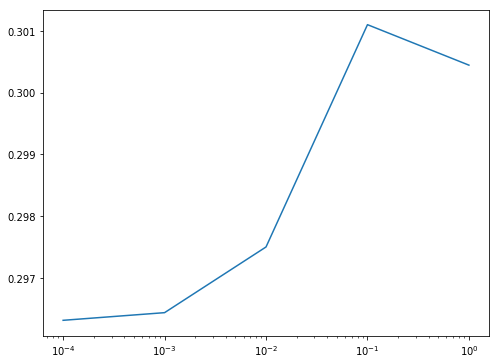

In [68]:
scores =grid.cv_results_['mean_test_score']
scores_std = grid.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

/home/ashmi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning:

Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.



(1.0, 0.0001)

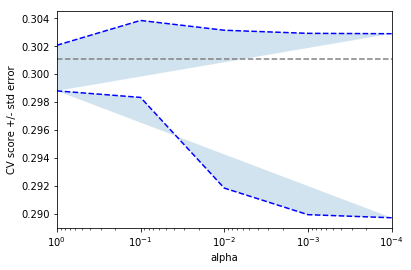

In [69]:
# plot error lines showing +/- std. errors of the scores
n_folds = 3
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])